### Calculo el perfil radial de desidad superficial

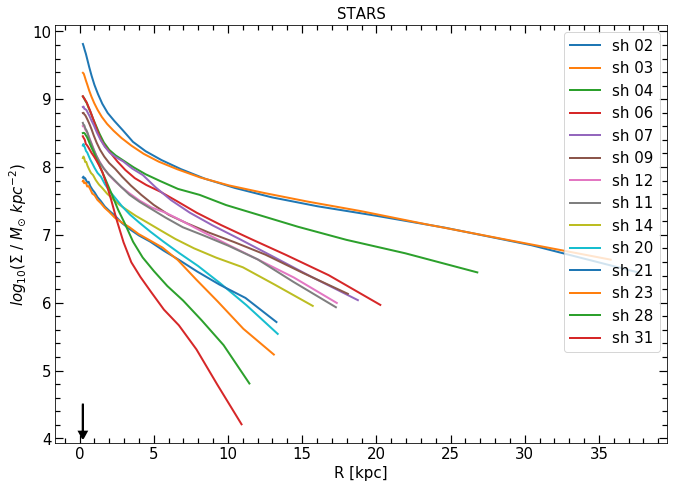

In [12]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import density

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit, = np.where(rn < rgal )
    
    R = np.sqrt(xn[limit]**2+yn[limit]**2)
    
    nbin = 25
    den = density.surf_density_log(R,mstr[limit],nbin)
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
        
    ax.plot(den[1],np.log10(den[0]), ls='-',lw=2, label='sh '+Id)    

ax.minorticks_on()
# ax.set_xscale('log')
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
# ax.set_xlim(0,40)
ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
ax.arrow(0.22,4.5,0,-0.5,length_includes_head=True,lw=2,color='k',
         head_length=0.1,
         head_width=0.5,#0.02,
        )
ax.legend(fontsize=15,fancybox=True, loc=1)
ax.set_title('STARS', fontsize=15)

plt.show()
fig.savefig('../_imagenes/surf_density_lin.png',dpi=100, xxbox_inches='tight')

### Hago los perfiles en bines de edad

subhalo_127000000000002


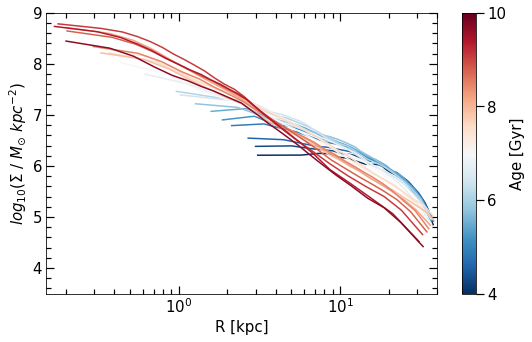

subhalo_127000000000003


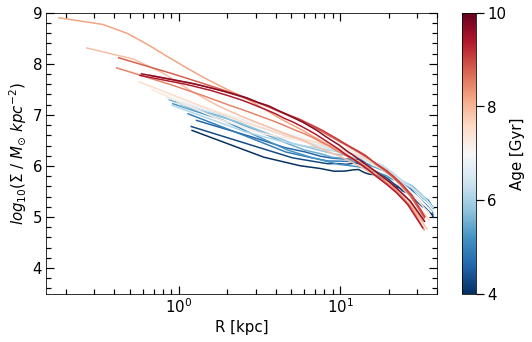

subhalo_127000000000004


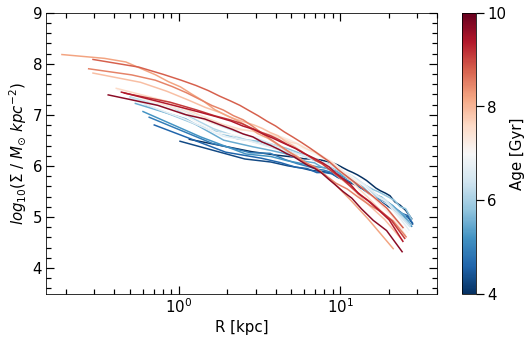

subhalo_127000000000006


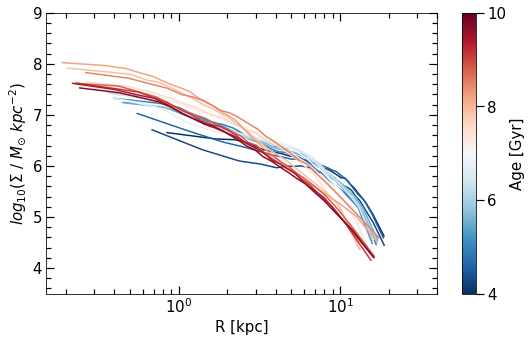

subhalo_127000000000007


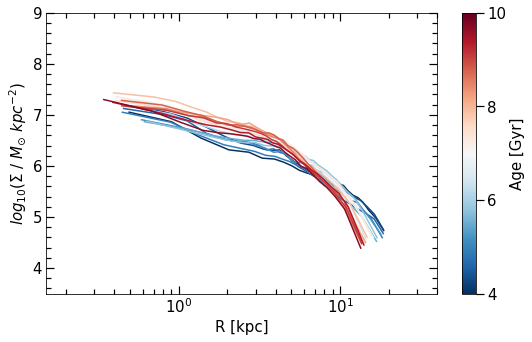

subhalo_127000000000009


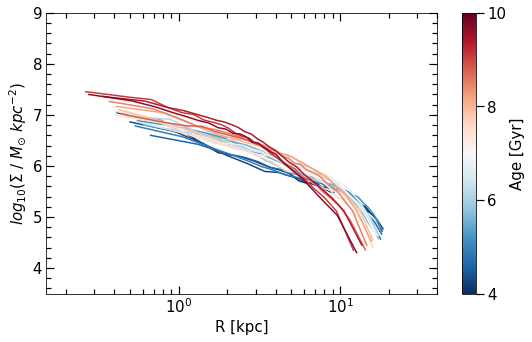

subhalo_127000000000012


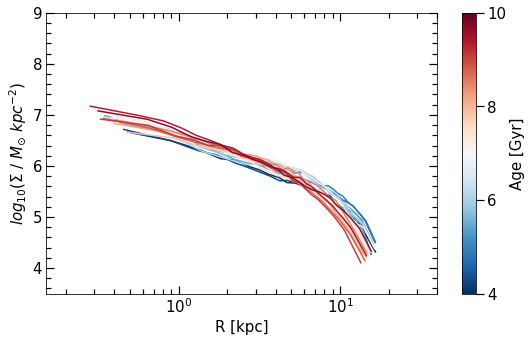

subhalo_127000000000011


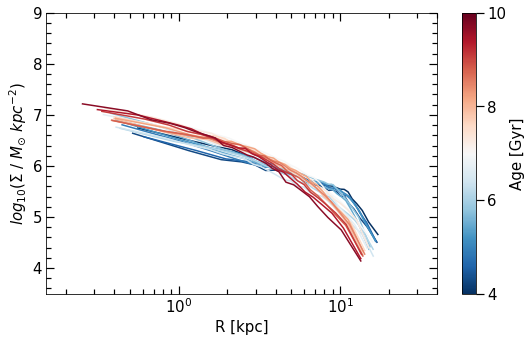

subhalo_127000000000014


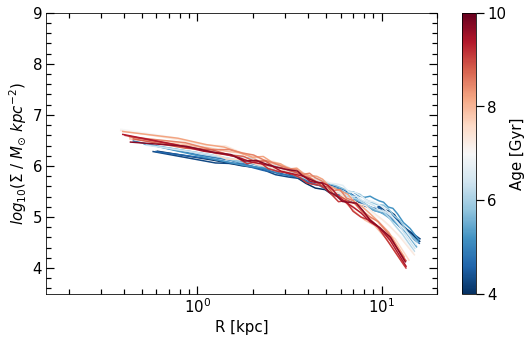

subhalo_127000000000020


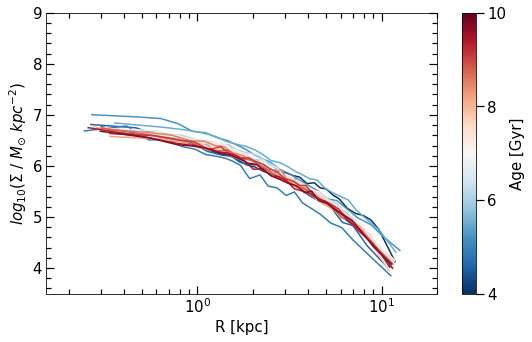

subhalo_127000000000021


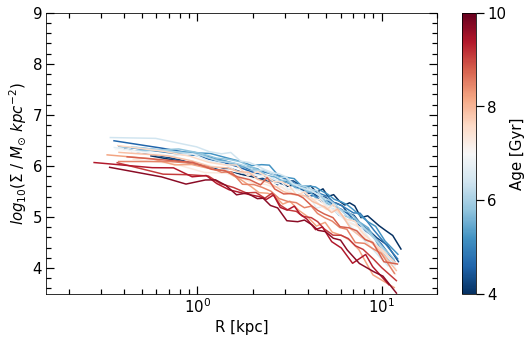

subhalo_127000000000023


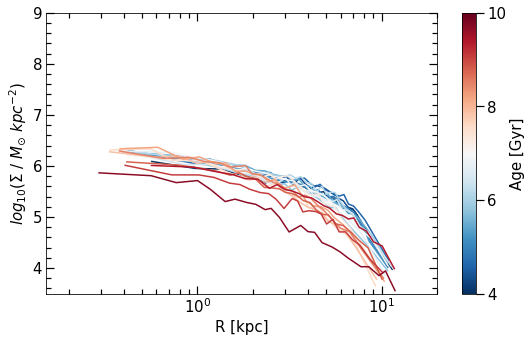

subhalo_127000000000028


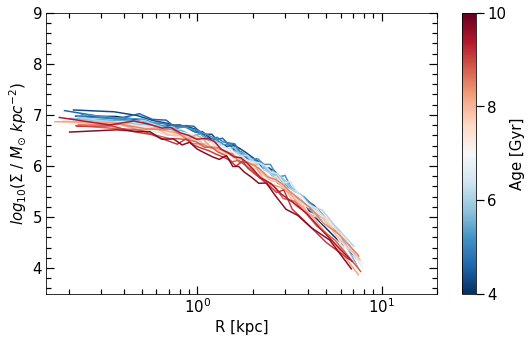

subhalo_127000000000031


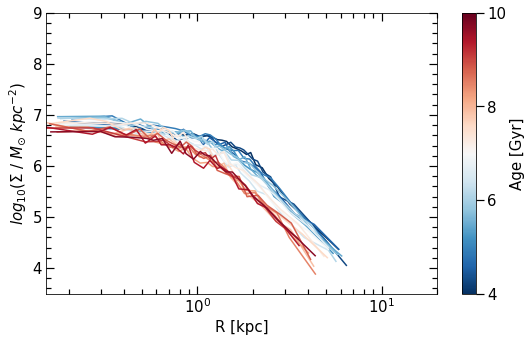

subhalo_127000000000030


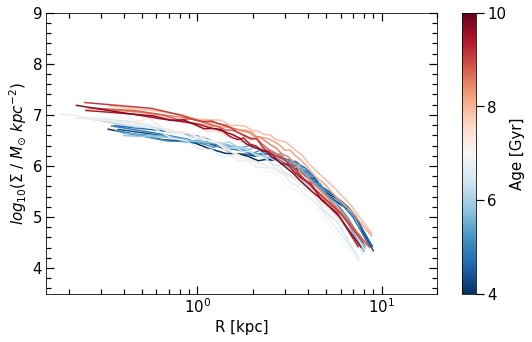

In [4]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import density

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/z/omarioni/gradients/_simulations/snap_127/'

for j in range(15):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    print ('subhalo_'+str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit2, = np.where(rn < rgal )
    
    age_ = age[limit2]
#     edades, = np.where((age_>4) & (age_<10))
    x_str = xn[limit2]
    y_str = yn[limit2]
    z_str = zn[limit2]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    nb = 20

    delta = (10.-4.)/nb
    rango = np.arange(4,10,delta)
    
    color_range = np.linspace(4,10,nb)
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')
    
    for i in rango:
        
        agelim, = np.where((age_>i) & (age_<i+delta))
        
        R = np.sqrt(x_str[agelim]**2 + y_str[agelim]**2)
        mass = mstr[limit2][agelim]
    
        nbin = 25
        den = density.surf_density(R,mass,nbin)
        
        ax.plot(den[1], np.log10(den[0]), ls='-', color = cmap.to_rgba(i))
    
    cbar = fig.colorbar(cmap,ticks=[4,6,8,10]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    if j > 7:
        ax.set_xlim(0.15,20)
    else:
        ax.set_xlim(0.15,40)
    
    ax.set_xscale('log')
    ax.set_ylim(3.5,9)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
    # ax.set_xlim(0,14)
    ax.set_ylabel(r'$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
#     ax.legend(fontsize=15,frameon=False)
    plt.show()
    fig.savefig('../_imagenes/surf_density/sd_subh_'+str('%d'%ID[j])+'.png',dpi=100, xxbox_inches='tight')

### Hago los perfiles de den sup en bines de edad y log en R

subhalo_127000000000002


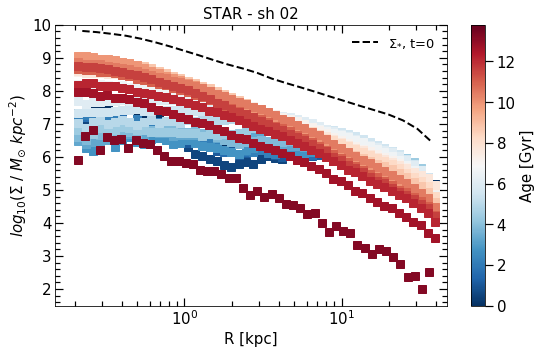

subhalo_127000000000003


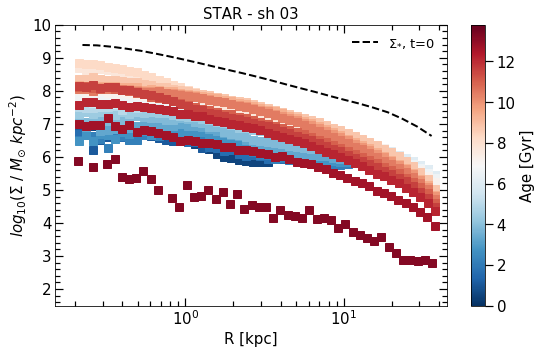

subhalo_127000000000004


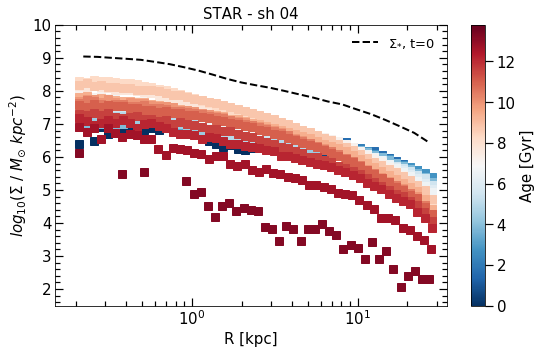

subhalo_127000000000006


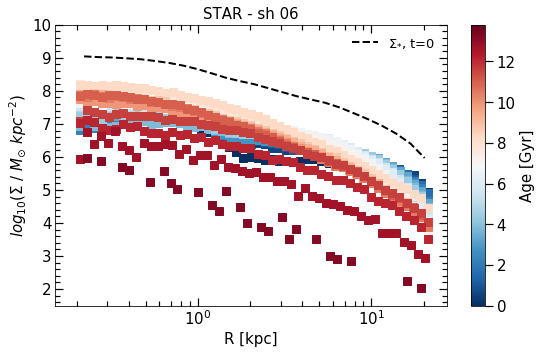

subhalo_127000000000007


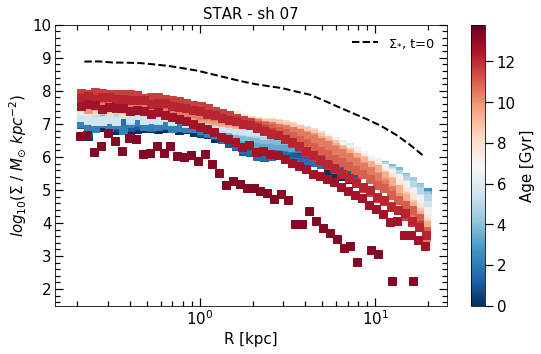

subhalo_127000000000009


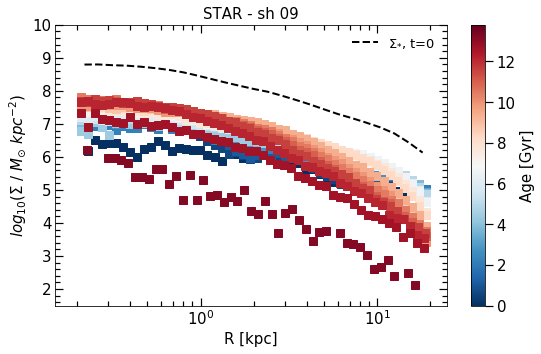

subhalo_127000000000012


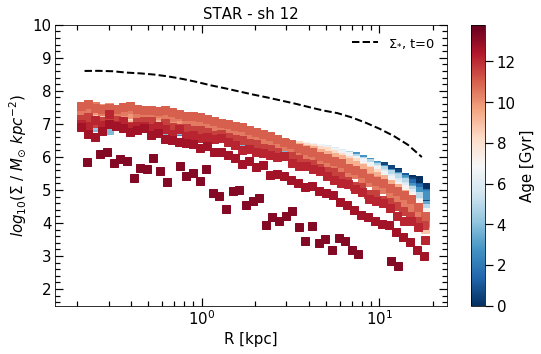

subhalo_127000000000011


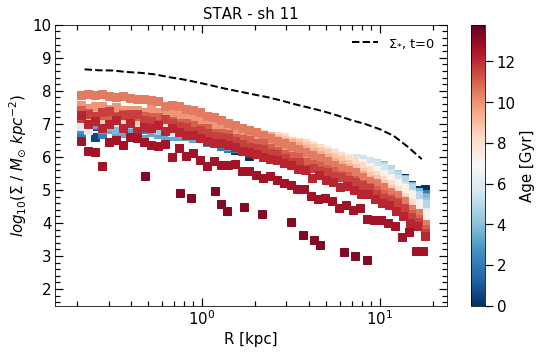

subhalo_127000000000014


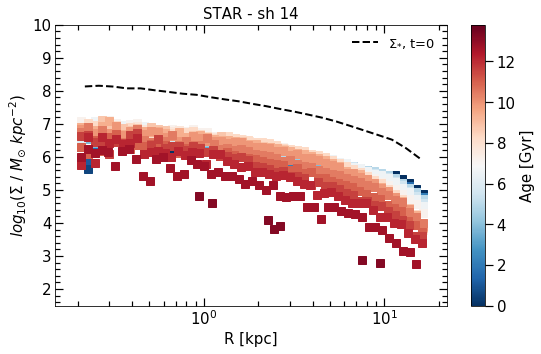

subhalo_127000000000020


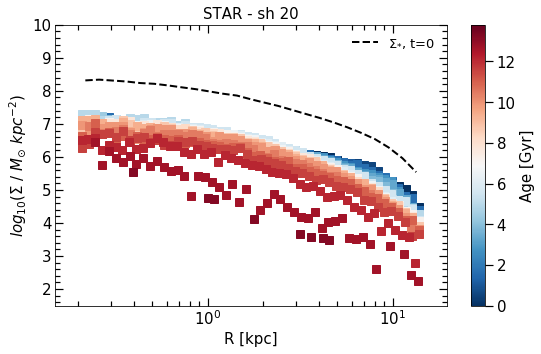

subhalo_127000000000021


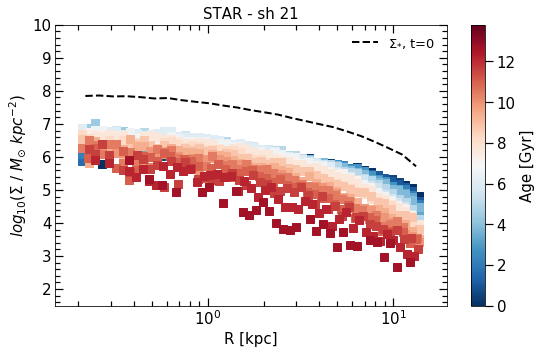

subhalo_127000000000023


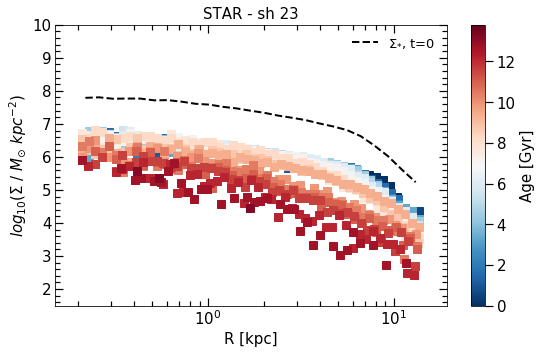

subhalo_127000000000028


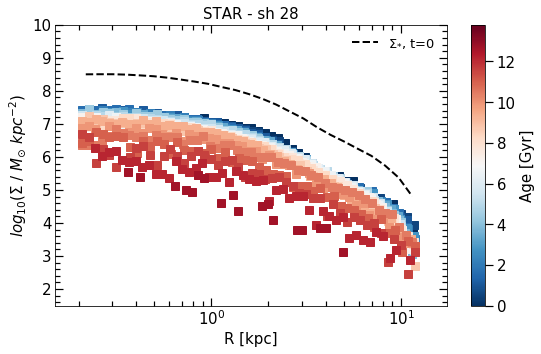

subhalo_127000000000031


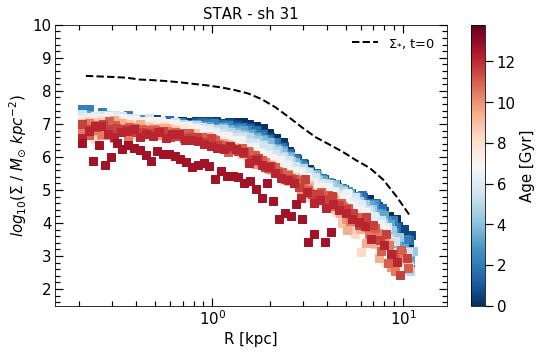

In [19]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines
import matplotlib as mpl
import density

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

path = '/store/erebos/omarioni/_simulations/snap_127/'

for j in range(14):
    
    snap = h5py.File(path + 'subhalo_'+str('%d'%ID[j])+'.h5py', 'r')
    
    Id = ''
    for aux in list(str('%d'%ID[j]))[-2:]:
        Id += aux
        
    print ('subhalo_'+str('%d'%ID[j]))

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]
    Om_L = snap['/Omega_Lambda'][()]
    Om_M = snap['/Omega_0'][()]
    Rvir = snap['/R200'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]
    
    sft  = snap['/Str/FormationTime'][()]

    amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
    ages = time.conv2(sft[amask], h, Om_L, Om_M) #transformo el tiempo de formacion de factor de escala a Gyr
    age  = np.max(ages) - ages #lo resto asi saco la edad de las particulas (inverso al tiempo de form)

    xstr = pstr[amask,0]*aexp/h
    ystr = pstr[amask,1]*aexp/h
    zstr = pstr[amask,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vstr[amask,0] *np.sqrt(aexp)
    v_y = vstr[amask,1] *np.sqrt(aexp)
    v_z = vstr[amask,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr[amask]*1e10/h
    
    rgal = 0.15*Rvir*aexp/h
    
    limit, = np.where(rstr < rgal)
    rsort = np.argsort(rstr[limit])
    Mc = np.cumsum(mstr[limit][rsort])
    Mgal = Mc[-1]
    limit50, = np.where(Mc < Mgal/2)
    r50 = rstr[limit][rsort][limit50][-1]

    veloc,=np.where(rstr < r50/2.)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,r50/2.)

    xn  = e1x*xstr + e1y*ystr + e1z*zstr
    yn  = e2x*xstr + e2y*ystr + e2z*zstr
    zn  = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    rn = np.sqrt(xn**2 + yn**2 + zn**2 )
    
    limit2, = np.where(rn < rgal )
    
    age_ = age[limit2]
    x_str = xn[limit2]
    y_str = yn[limit2]
    z_str = zn[limit2]
    m_str = mstr[limit2]
    
    Rstr = np.sqrt(x_str**2+y_str**2)
    
    bines=25
    sigma_tot, med_tot = density.surf_density_log(Rstr,m_str,bines)
    
    perfil = np.ndarray([bines,2])
    perfil[:,0]=med_tot
    perfil[:,1]=sigma_tot
    np.savetxt('../_data/densup_profile/perfil_densup_sh_'+str('%d'%ID[j])+'.dat', perfil, fmt=('%12.8f','%12.8f'))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)
    
    nb = 25

    delta = (13.8-0.)/nb
    rango = np.arange(0,13.8,delta)
    
    color_range = np.linspace(0,13.8,nb)
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')
    
    for i in rango:
        
        agelim, = np.where((age_>i) & (age_<i+delta))
        
        if len(agelim)==0 or len(agelim)==1:
            continue
            
        R = Rstr[agelim]
        mass = m_str[agelim]
    
        nbin = 50
        sigma, med = density.surf_density_log(R,mass,nbin)
        
        ax.plot(med, np.log10(sigma), 's',ms=7.5, color = cmap.to_rgba(i))
    
    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.plot(med_tot,np.log10(sigma_tot), '--k',lw=2, label=r'$\Sigma_{*}$, t=0')
    ax.set_xscale('log')
    ax.set_ylim(1.5,10)
    ax.set_xlim(0.15,rgal+5)
    ax.minorticks_on()
    ax.set_title('STAR - sh '+Id, fontsize=15)
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
    ax.set_ylabel(r'$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    ax.legend(fontsize=13,frameon=False,loc=1)

    plt.show()
    fig.savefig('../_imagenes/surf_density/sd_subh_log_'+str('%d'%ID[j])+'.png',dpi=100, xxbox_inches='tight')

### Hago los perfiles para el gas

127000000000002.0


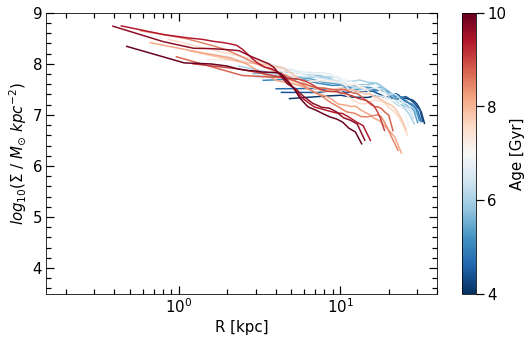

127000000000003.0


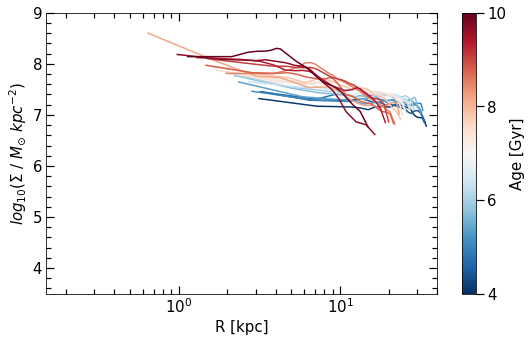

127000000000004.0


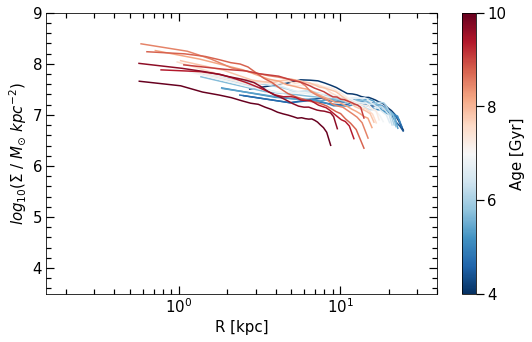

127000000000006.0


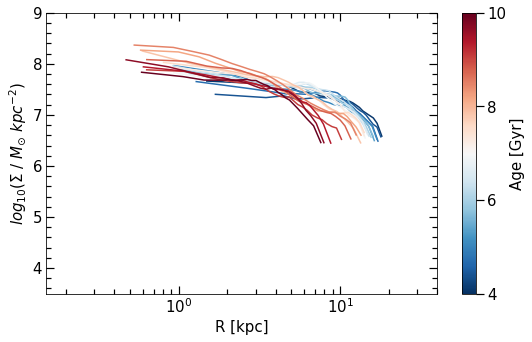

127000000000007.0


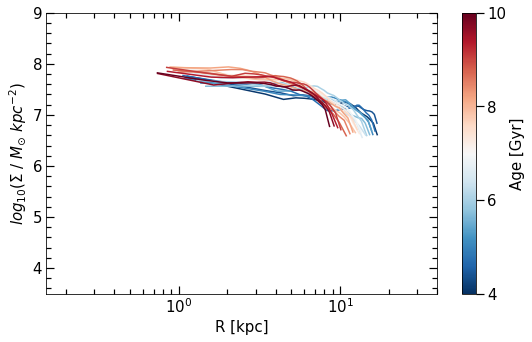

127000000000009.0


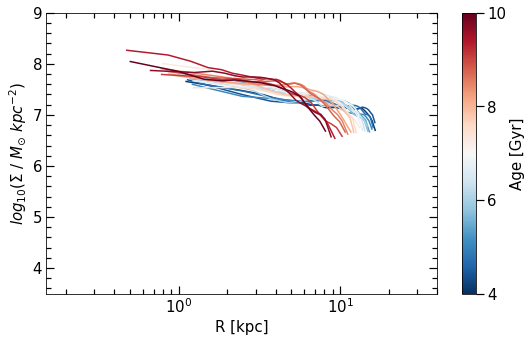

127000000000012.0


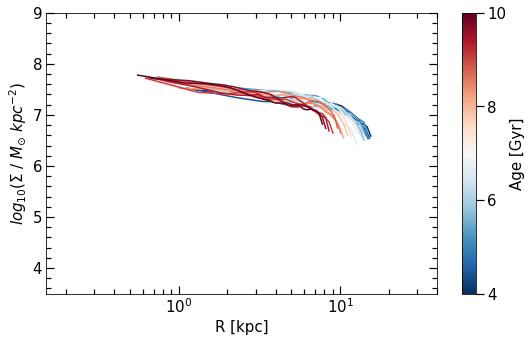

127000000000011.0


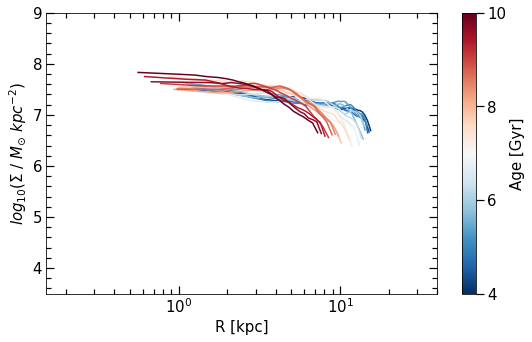

127000000000014.0


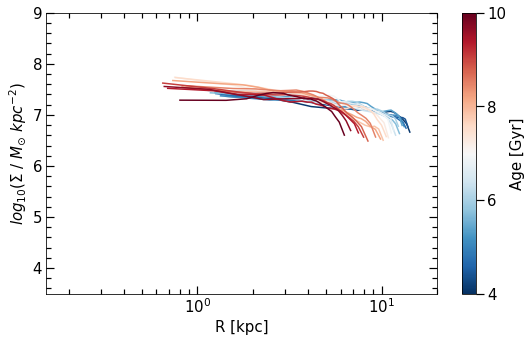

127000000000020.0


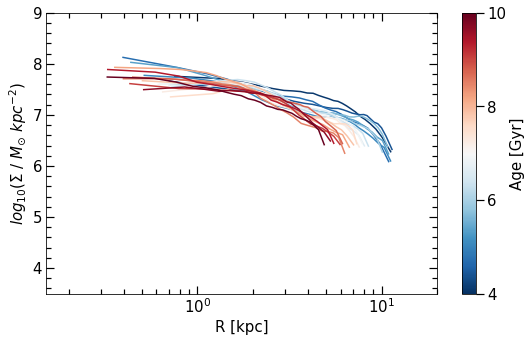

127000000000021.0


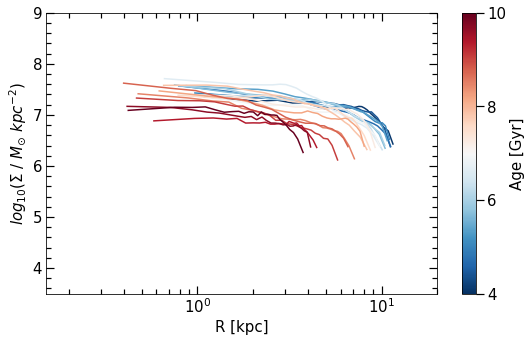

127000000000023.0


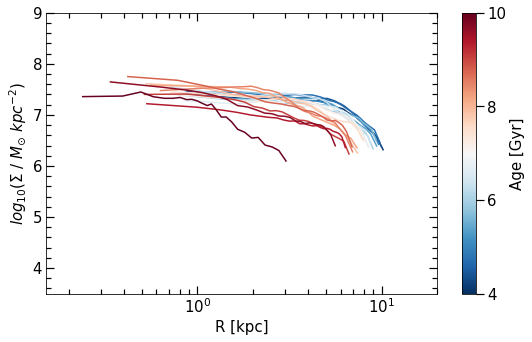

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
mask,  = np.where((ages >= 4) & (ages <=10))

for j in range(12):
    
    SDP_ = np.loadtxt('../_data/gas_surfden/gas_surfden_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = SDP_[:,0]
    SDP = SDP_[:,1]
    snap = SDP_[:,2]

    print(shID[j])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    rango = np.arange(0,len(s[mask]),2)

    #Esto es para la barra de colores
    color_range = np.linspace(4,10,len(rango))
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')

    for i in rango:
        select, = np.where(snap == s[mask][i])
        ax.plot(med[select],np.log10(SDP[select]), ls='-',color = cmap.to_rgba(ages[mask][i]))

    cbar = fig.colorbar(cmap,ticks=[4,6,8,10]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    if j > 7:
        ax.set_xlim(0.15,20)
    else:
        ax.set_xlim(0.15,40)

    ax.set_xscale('log')
    ax.set_ylim(3.5,9)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    # ax.set_xlim(0,14)
    ax.set_ylabel(r'$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    #     ax.legend(fontsize=15,frameon=False)

    plt.show()

    fig.savefig('../_imagenes/surf_density_gas_profile/sd_gas_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')

### Perfil gas para todas las galaxias

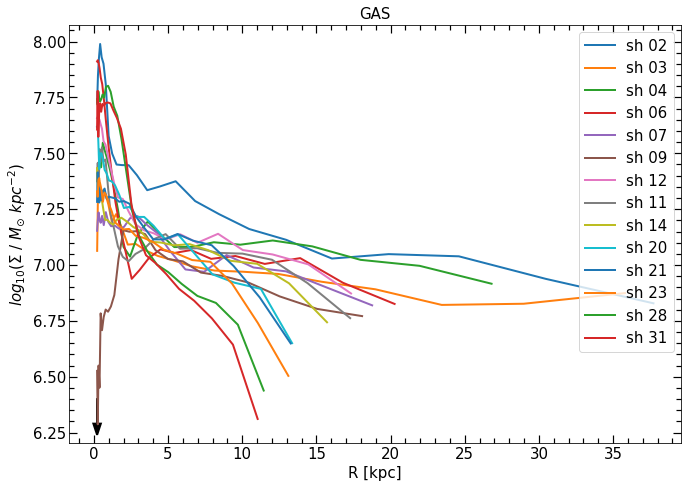

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
R200 = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal=0.15*R200
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
# mask,  = np.where((ages >= 4) & (ages <=10))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.1, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

for j in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[j]))[-2:]:
        Id += aux
        
    SDP_ = np.loadtxt('../_data/gas_surfden/gas_surfden_log_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = SDP_[:,0]
    SDP = SDP_[:,1]
    snap = SDP_[:,2]

    select, = np.where(snap == 127)
    ax.plot(med[select],np.log10(SDP[select]), ls='-',lw=2, label='sh '+Id)

ax.minorticks_on()
# ax.set_xscale('log')
ax.tick_params( labelsize=15)
ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
ax.set_ylabel('$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
ax.set_xlabel('R [kpc]',fontsize=15)
ax.arrow(0.22,6.4,0,-0.16,length_includes_head=True,lw=2,color='k',
         head_length=0.05,
         head_width=0.5,#0.02,
        )
ax.legend(fontsize=15,fancybox=True, loc=1)
ax.set_title('GAS', fontsize=15)

plt.show()
fig.savefig('../_imagenes/surf_density_gas.png',dpi=100, xxbox_inches='tight')

127000000000002.0


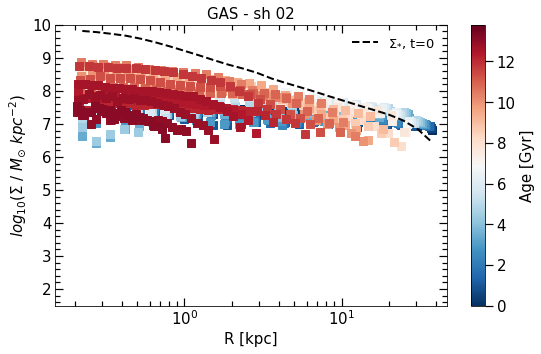

127000000000003.0


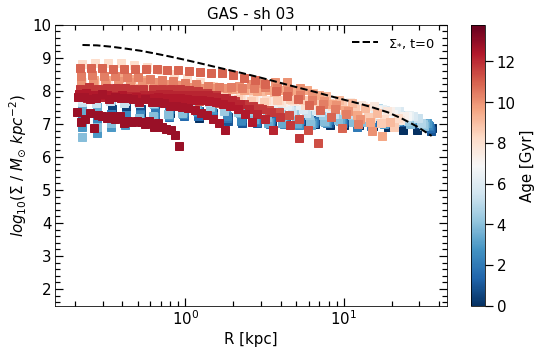

127000000000004.0


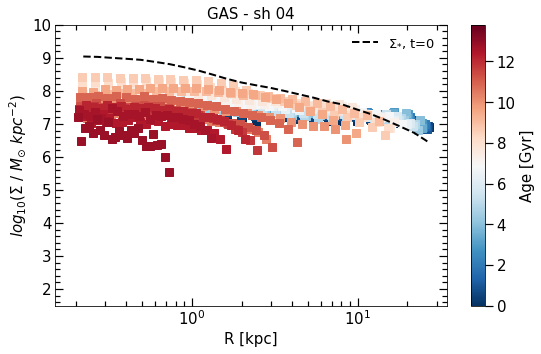

127000000000006.0


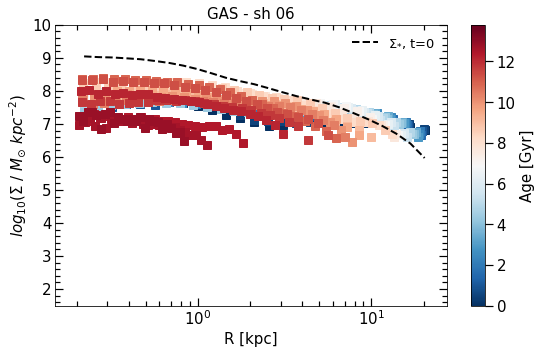

127000000000007.0


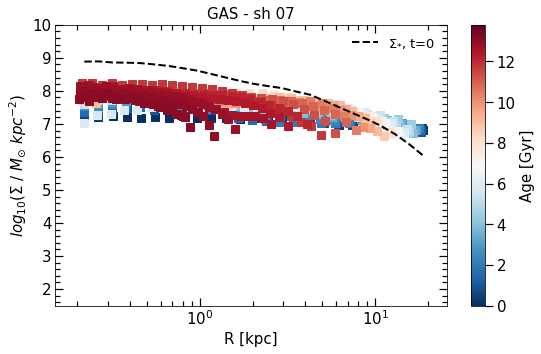

127000000000009.0


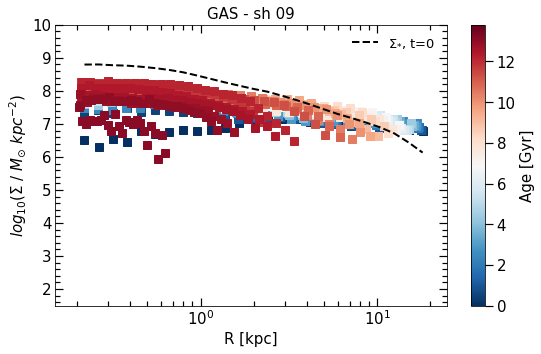

127000000000012.0


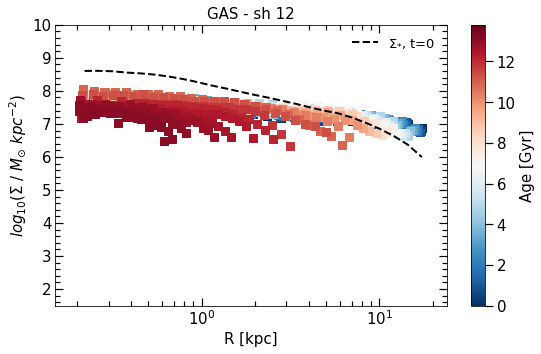

127000000000011.0


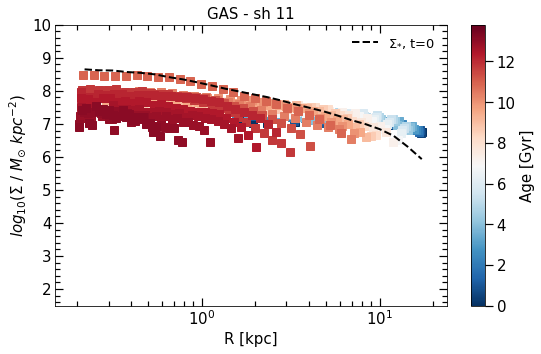

127000000000014.0


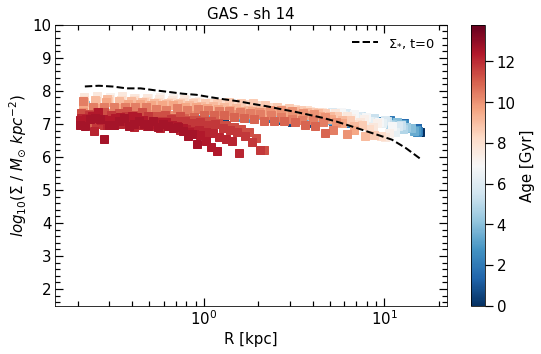

127000000000020.0


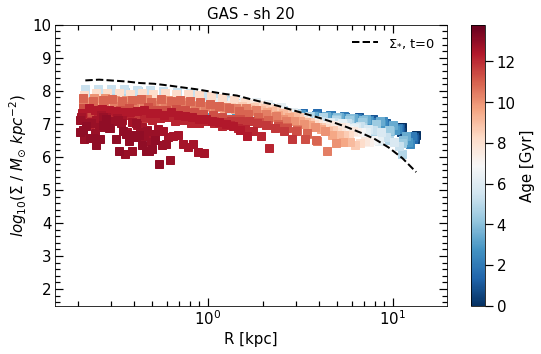

127000000000021.0


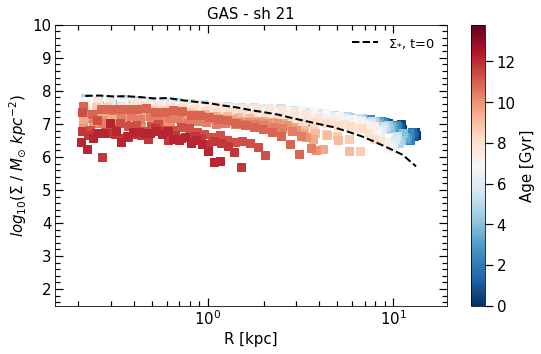

127000000000023.0


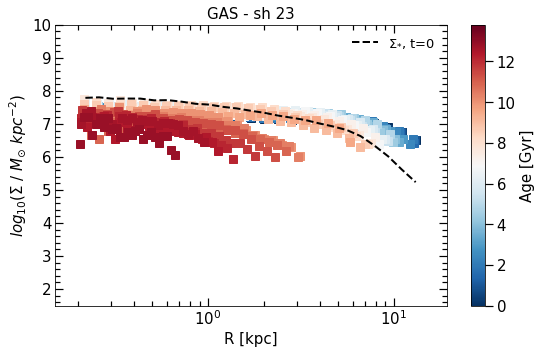

127000000000028.0


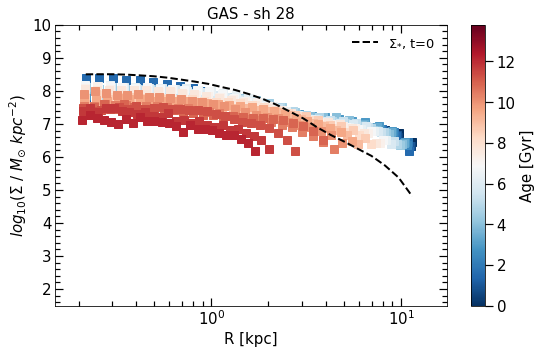

127000000000031.0


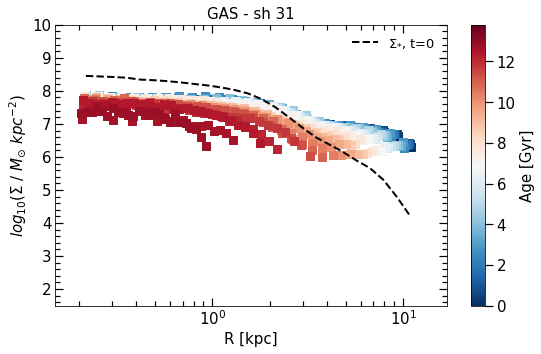

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

shID = np.loadtxt('../_data/my_halos.dat')[:,0]
R200 = np.loadtxt('../_data/my_halos.dat')[:,2]
rgal=0.15*R200
data = np.loadtxt('../_data/time.dat')
s = data[:,0]
T = data[:,3]

ages = T.max() - T
# mask,  = np.where((ages >= 4) & (ages <=10))

for j in range(14):
    
    Id = ''
    for aux in list(str('%d'%shID[j]))[-2:]:
        Id += aux
        
    perfil = np.loadtxt('../_data/densup_profile/perfil_densup_sh_'+str('%d'%shID[j])+'.dat')
    med_tot = perfil[:,0]
    sigma_tot = perfil[:,1]
        
    SDP_ = np.loadtxt('../_data/gas_surfden/gas_surfden_log_prof_sh_'+str('%d'%shID[j])+'.dat')
    med = SDP_[:,0]
    SDP = SDP_[:,1]
    snap = SDP_[:,2]

    print(shID[j])
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    fig.subplots_adjust(bottom=0.15, left =0.12, right = 0.97, top = 0.93, wspace=0., hspace= 0)

    rango = np.arange(0,len(s),3)

    #Esto es para la barra de colores
    color_range = np.linspace(0,13.8,len(rango))
    norm = mpl.colors.Normalize(vmin = color_range.min(),vmax= color_range.max())
    cmap = mpl.cm.ScalarMappable(norm = norm, cmap = 'RdBu_r')

    for i in rango:
        select, = np.where(snap == s[i])
        ax.plot(med[select],np.log10(SDP[select]), 's',ms=7.5,color = cmap.to_rgba(ages[i]))

    cbar = fig.colorbar(cmap,ticks=[0,2,4,6,8,10,12,14]) #pad=0.01)
    cbar.set_label('Age [Gyr]',fontsize=15)
    cbar.ax.tick_params( labelsize=15)
    cbar.ax.tick_params(length=8, width=1.2, which='major')
    
    ax.plot(med_tot,np.log10(sigma_tot), '--k',lw=2, label=r'$\Sigma_{*}$, t=0')
    ax.set_xscale('log')
    ax.set_ylim(1.5,10)
    ax.set_xlim(0.15,rgal[j]+5)
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    ax.set_ylabel(r'$log_{10}$($\Sigma$ / $M_{\odot}$ $kpc^{-2}$)',fontsize=15)
    ax.set_xlabel('R [kpc]',fontsize=15)
    ax.set_title('GAS - sh '+Id, fontsize=15)
    ax.legend(fontsize=13,frameon=False,loc=1)

    plt.show()

    fig.savefig('../_imagenes/surf_density_gas_profile/sd_gas_log_sh_'+str('%d'%shID[j])+'.png',dpi=100, xxbox_inches='tight')